In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def S(x):
    
    """ defining shear function S
    """
    return (10 - 2*x)

In [3]:
def M(x):
    
    """ defining M after calculated analytically
    """
    return (10*x - x**2)

In [4]:
def evaluate_M(h, method):
    
    """ evaluate M function
        h -step size
        method - either euler function or rk2
    """
    beam_length = 10    # meters
    grid = np.arange(0,beam_length+h,h)
    
    M = np.array([0])    # initialize M with its initial value
    
    for x in grid[1:]:
        Mi = M[-1]
        Mi_plus_1 = method(h,x, Mi)
        M = np.append(M,Mi_plus_1)
        
    return grid, M

In [5]:
def euler(h, x, Mi):
    
    """ calculate a specific value of the M function using euler formula
    """
    Mi_plus_1 = Mi + h*S(x)
    return Mi_plus_1

In [6]:
def rk2(h, x, Mi):
    
    """ calculate a specific value of the M function using rk2 formula
    """
    Mi_plus_1 = Mi + (h/2)*(S(x) + S(x+h)) 
    return Mi_plus_1

In [7]:
x1, y1 = evaluate_M(0.05, euler)
x2, y2 = evaluate_M(0.25, euler)
x3, y3 = evaluate_M(0.25, rk2)

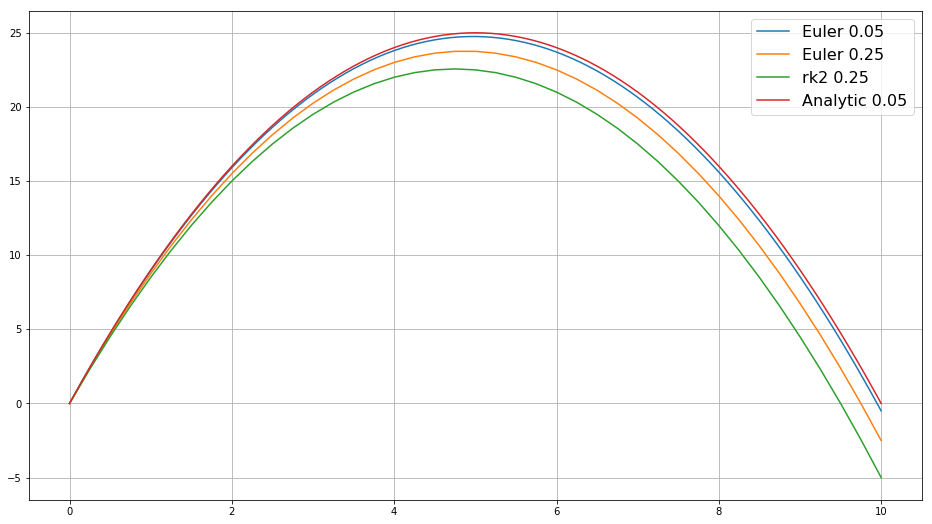

In [8]:
plt.figure(figsize=(16,9))
plt.plot(x1, y1, label="Euler 0.05")
plt.plot(x2, y2, label="Euler 0.25")
plt.plot(x3, y3, label="rk2 0.25")
x = x1
plt.plot(x, M(x), label="Analytic 0.05")

plt.legend(prop={'size': 16})
plt.grid()
plt.show()
# plt.savefig("fig1.png")